#### **Inherent Truths:**

#### 85% of AI and Machine Learning projects fail to deliver business value.

###### *– Gartner (2019)*

This isn't meant to scare you. It's a reality check.

Models don't fail because their math was wrong, or because their data was poor. They fail because their  
1. Goal was unrealistic.
2. Their data was extremely misunderstood.
3. They have a flawed understanding of their model performance.

If you're building a regression model to predict real-world outcomes, there are a few core truths to internalize first.

#### 1. Unrealistic Goals

In the wake of AI and intelligent systems, it's tempting to set goals that exceed what these systems can actually learn. Modern day tools are powerful and complex under the hood, but to act as if they're all-powerful is to overestimate the tool and underestimate the problem.

#### If a pattern doesn't exist in data, then no model-- no matter how advanced it is-- can find it.

My teammate Ming Do and I spent months trying to model storm data from NOAA, with the goal of predicting total damaged property. We thought,

> "Maybe we need XGBoost instead of Linear Regression."

> "Maybe we just need to tune the hyperparameters or polynomially expand the features..."

With the data in hand, there were no features that explained why one event caused \$150,000 in damaged property vs another causing $50,000. We looked throughout 150,000+ rows of data, trying to find patterns in high DP events. Maybe these events are always tsunamis. Maybe they share a common duration of minutes for which the event started and ended.

**The pattern wasn't in the data.**

The causes were unrecorded, random, and driven by factors not captured in the dataset.

What allowed us to make progress was understanding the learnable space. Making estimations for around $50,000 and under? This is doable. Trying to precicely predict million dollar events? We would need far more variables and predictive power.

#### Know Your Learnable Space

Ask yourself these three questions to avoid building toward an impossible goal.

> Is there a consistent, measurable pattern in the data?

>> Can you observe a meaningful correlation between inputs and outcomes?

> Are the inputs I have enough to explain the target variable?

>> If you're trying to predict house prices but don't have square footage, you're missing critical input.

> Would a human expert be able to make accurate predictions with this data?

>> If not, your model likely won't either.

Try to be honest with your reasoning. If the data doesn't give humans a fighting chance, it likely won't help your model either. But if there's even a basic, consistent relationship, then you're in a strong position to model it and to begin generating meaningful metrics.

**Key takeaway:** A good model starts with a problem that's actually learnable -- one that's grounded in patterns that data can reveal.



#### 2. Misunderstood Data

Your entire pipeline can fall apart if you misunderstand the data you're working with.

#### Correlation is not intuition, and intuition is not analysis

One of our columns, MAGNITUDE, seemed incredibly important. It was the core of every pipeline we created. At first, we blindly imputed null values in magnitude with the median of magnitude. This seemed to work well and appeared to provide us with a completely full and poweful feature. Until we dived deeper.

What we thought was a highly important predictive feature turned out to be just noise. This was proven in a plot importance table:

\\

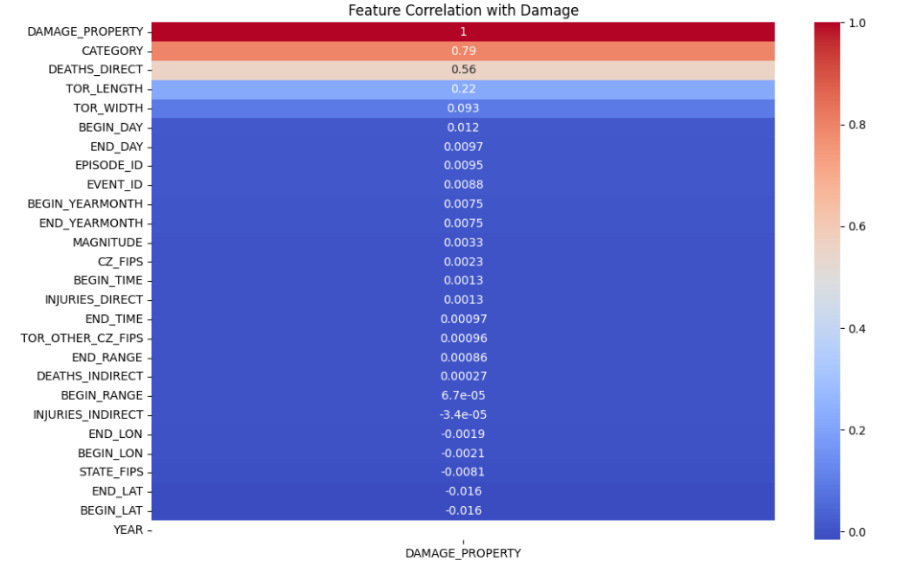

\\

Sure, keeping magnitude may have slightly improved our R^2 score-- but that gain was misleading. Magnitude only improved our R^2 by 1% in testing, despite improving training R^2 by 20%. It didn't generalize in testing, and it didn't reflect a real relationship. We were feeding the model noise-- and any model, especially flexible ones, can force a fit onto any set of numbers. High-capacity models like Neural Networks will memorize every little piece of noise and therefore overfit more. Noisey features won't generalize, and they certaintly wont become the key features that explains your outcomes. And when it comes time to generate confidence and prediction intervals, the ranges wil be massive, unstable and unreliable.

How do you prevent yourself from making this mistake? Here are three questions you can ask when evaluating a feature:

> Does this feature have a clear, explainable link to the target variable?

>> If not, it's likely noise. You should be able to describe in plain language why this feature might help predict the outcome. If the connection feels speculative, test it rigorously or drop it outright.

> Is the feature improving test performance, or just training accuracy?

>> If the performance tanks on the test set, you're likely overfitting. True signal improves both training and test scores.

> Would removing it simplify the model without hurting generalization?

>> In a deployable model, it's not worth it to ask the user for a value that might only improve our R^2 by a small amount (like 1% or less).

This type of overfitting — where a model learns to fit noise instead of signal — leads to poor generalization. It’s especially common when the number of features is high relative to meaningful signal, a phenomenon explored in what's called the Curse of Dimensionality.

**Key Takeaway:** A good model starts with features that are genuinely learnable — grounded in real, explainable patterns. Intuition isn’t enough. If a feature doesn’t hold up under analysis, it’s likely noise. And noise will always lead to fragile, overfit models that break in the real world.

